In [55]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import gpboost as gpb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# Gathering the data

In [56]:
import kagglehub

path = kagglehub.dataset_download("nishaanamin/march-madness-data")

print("Path to dataset files:", path)

Path to dataset files: /Users/kolbytaylor/.cache/kagglehub/datasets/nishaanamin/march-madness-data/versions/121


In [57]:
# Loading all the different data sets in

# Tournament Results and Data
coach_results = pd.read_csv("march-madness-data/versions/121/Coach Results.csv")
seed_results = pd.read_csv("march-madness-data/versions/121/Seed Results.csv")
team_results = pd.read_csv("march-madness-data/versions/121/Team Results.csv")
conference_results = pd.read_csv("march-madness-data/versions/121/Conference Results.csv")
tournament_locations = pd.read_csv("march-madness-data/versions/121/Tournament Locations.csv")
tournament_matchups = pd.read_csv("march-madness-data/versions/121/Tournament Matchups.csv")
upset_counts = pd.read_csv("march-madness-data/versions/121/Upset Count.csv")
upset_seed_info = pd.read_csv("march-madness-data/versions/121/Upset Seed Info.csv")

# Bartorvik
barttorvik_away_neutral = pd.read_csv("march-madness-data/versions/121/Barttorvik Away-Neutral.csv")
barttorvik_away = pd.read_csv("march-madness-data/versions/121/Barttorvik Away.csv")
barttorvik_home = pd.read_csv("march-madness-data/versions/121/Barttorvik Home.csv")
barttorvik_neutral = pd.read_csv("march-madness-data/versions/121/Barttorvik Home.csv")
kenpom_barttorvik = pd.read_csv("march-madness-data/versions/121/KenPom Barttorvik.csv")

# Conference Stats
conference_stats = pd.read_csv("march-madness-data/versions/121/Conference Stats.csv")
conference_away_neutral = pd.read_csv("march-madness-data/versions/121/Conference Stats Away Neutral.csv")
conference_away = pd.read_csv("march-madness-data/versions/121/Conference Stats Away.csv")
conference_home = pd.read_csv("march-madness-data/versions/121/Conference Stats Home.csv")
conference_neutral = pd.read_csv("march-madness-data/versions/121/Conference Stats Neutral.csv")

# Resumes
resumes = pd.read_csv("march-madness-data/versions/121/Resumes.csv")

# Shooting Splits
shooting_splits = pd.read_csv("march-madness-data/versions/121/Shooting Splits.csv")

# Other Websites
ratings_538 = pd.read_csv("march-madness-data/versions/121/538 Ratings.csv")
heat_check = pd.read_csv("march-madness-data/versions/121/Heat Check Tournament Index.csv")

# People's Opinions
preseason_votes = pd.read_csv("march-madness-data/versions/121/Preseason Votes.csv")
public_picks = pd.read_csv("march-madness-data/versions/121/Public Picks.csv")


In [58]:
# Take the columns in the dataframes that have home, away, and neutral; and subscript them so that we can recognize what it is
# Barttorvik
for col in barttorvik_away_neutral.columns:
    barttorvik_away_neutral = barttorvik_away_neutral.rename(columns={col: col + " AWAY-NEUTRAL"})

for col in barttorvik_away.columns:
    barttorvik_away = barttorvik_away.rename(columns={col: col + " AWAY"})

for col in barttorvik_home.columns:
    barttorvik_home = barttorvik_home.rename(columns={col: col + " HOME"})

for col in barttorvik_neutral.columns:
    barttorvik_neutral = barttorvik_neutral.rename(columns={col: col + " NEUTRAL"})



# Conference Statistics
for col in conference_away_neutral.columns:
    conference_away_neutral = conference_away_neutral.rename(columns={col: col + " AWAY-NEUTRAL"})

for col in conference_away.columns:
    conference_away = conference_away.rename(columns={col: col + " AWAY"})

for col in conference_home.columns:
    conference_home = conference_home.rename(columns={col: col + " HOME"})

for col in conference_neutral.columns:
    conference_neutral = conference_neutral.rename(columns={col: col + " NEUTRAL"})


In [59]:
barttorvik_away_neutral.head()

,YEAR AWAY-NEUTRAL,TEAM NO AWAY-NEUTRAL,TEAM ID AWAY-NEUTRAL,TEAM AWAY-NEUTRAL,SEED AWAY-NEUTRAL,ROUND AWAY-NEUTRAL,BADJ EM AWAY-NEUTRAL,BADJ O AWAY-NEUTRAL,BADJ D AWAY-NEUTRAL,BARTHAG AWAY-NEUTRAL,...,BADJT RANK AWAY-NEUTRAL,AVG HGT RANK AWAY-NEUTRAL,EFF HGT RANK AWAY-NEUTRAL,EXP RANK AWAY-NEUTRAL,TALENT RANK AWAY-NEUTRAL,FT% RANK AWAY-NEUTRAL,OP FT% RANK AWAY-NEUTRAL,PPPO RANK AWAY-NEUTRAL,PPPD RANK AWAY-NEUTRAL,ELITE SOS RANK AWAY-NEUTRAL
0,2025,1147,2,Akron,13,0,4.7,108.6,103.9,0.625,...,10,361,364,73,149,48,143,55,54,307
1,2025,1146,3,Alabama,2,0,31.0,130.5,99.5,0.958,...,3,57,4,261,32,201,75,5,253,4
2,2025,1145,4,Alabama St.,16,0,-7.2,100.5,107.7,0.311,...,136,285,239,83,251,270,46,236,77,263
3,2025,1144,6,American,16,0,-8.7,102.0,110.7,0.281,...,343,303,248,181,364,40,165,222,244,303
4,2025,1143,8,Arizona,4,0,24.4,120.7,96.3,0.931,...,42,74,129,225,16,5,223,63,97,10


There are many columns in the Barttorvik data, and splitting them out by where the team played multiplies it by five. In total we have around 170 features. Half of them are metrics and the other half rank those metrics in all Division 1. We should probably sort these out first. I'm going to try doing some analysis with the features. I'm going to fit the same model with the overall, away, netural, home, and neutral-away features and see which ones work the best, as well as do some AB testing to see if there's a significant difference between them.

In [60]:
# Creates the target, 0-6 based on how many games were won
conditions = [
    (kenpom_barttorvik['ROUND'] == 0) | (kenpom_barttorvik['ROUND'] == 68),
    (kenpom_barttorvik['ROUND'] == 64),
    (kenpom_barttorvik['ROUND'] == 32),
    (kenpom_barttorvik['ROUND'] == 16),
    (kenpom_barttorvik['ROUND'] == 8),
    (kenpom_barttorvik['ROUND'] == 4),
    (kenpom_barttorvik['ROUND'] == 2),
    (kenpom_barttorvik['ROUND'] == 1)
]

values = [np.nan, 0, 1, 2, 3, 4, 5, 6]

kenpom_barttorvik['TARGET'] = np.select(conditions, values, default=np.nan)
barttorvik_away_neutral['TARGET'] = np.select(conditions, values, default=np.nan)
barttorvik_away['TARGET'] = np.select(conditions, values, default=np.nan)
barttorvik_home['TARGET'] = np.select(conditions, values, default=np.nan)
barttorvik_neutral['TARGET'] = np.select(conditions, values, default=np.nan)

In [61]:
barttorvik_away_neutral.head()

,YEAR AWAY-NEUTRAL,TEAM NO AWAY-NEUTRAL,TEAM ID AWAY-NEUTRAL,TEAM AWAY-NEUTRAL,SEED AWAY-NEUTRAL,ROUND AWAY-NEUTRAL,BADJ EM AWAY-NEUTRAL,BADJ O AWAY-NEUTRAL,BADJ D AWAY-NEUTRAL,BARTHAG AWAY-NEUTRAL,...,AVG HGT RANK AWAY-NEUTRAL,EFF HGT RANK AWAY-NEUTRAL,EXP RANK AWAY-NEUTRAL,TALENT RANK AWAY-NEUTRAL,FT% RANK AWAY-NEUTRAL,OP FT% RANK AWAY-NEUTRAL,PPPO RANK AWAY-NEUTRAL,PPPD RANK AWAY-NEUTRAL,ELITE SOS RANK AWAY-NEUTRAL,TARGET
0,2025,1147,2,Akron,13,0,4.7,108.6,103.9,0.625,...,361,364,73,149,48,143,55,54,307,NaN
1,2025,1146,3,Alabama,2,0,31.0,130.5,99.5,0.958,...,57,4,261,32,201,75,5,253,4,NaN
2,2025,1145,4,Alabama St.,16,0,-7.2,100.5,107.7,0.311,...,285,239,83,251,270,46,236,77,263,NaN
3,2025,1144,6,American,16,0,-8.7,102.0,110.7,0.281,...,303,248,181,364,40,165,222,244,303,NaN
4,2025,1143,8,Arizona,4,0,24.4,120.7,96.3,0.931,...,74,129,225,16,5,223,63,97,10,NaN


In [62]:
X_barttorvik = kenpom_barttorvik.drop(columns=['YEAR', 'CONF', 'CONF ID', 'QUAD NO', 'QUAD ID', 'TEAM NO', 'TEAM ID', 'TEAM', 'SEED', 'ROUND', 'TARGET'])
y_barttorvik = kenpom_barttorvik['TARGET']

X_barttorvik_away_neutral = barttorvik_away_neutral.drop(columns=['YEAR AWAY-NEUTRAL', 'TEAM NO AWAY-NEUTRAL', 'TEAM ID AWAY-NEUTRAL', 'TEAM AWAY-NEUTRAL', 'SEED AWAY-NEUTRAL', 'ROUND AWAY-NEUTRAL', 'TARGET'])
y_barttorvik_away_neutral = barttorvik_away_neutral['TARGET']

X_barttorvik_away = barttorvik_away.drop(columns=['YEAR AWAY', 'TEAM NO AWAY', 'TEAM ID AWAY', 'TEAM AWAY', 'SEED AWAY', 'ROUND AWAY', 'TARGET'])
y_barttorvik_away = barttorvik_away['TARGET']

X_barttorvik_home = barttorvik_home.drop(columns=['YEAR HOME', 'TEAM NO HOME', 'TEAM ID HOME', 'TEAM HOME', 'SEED HOME', 'ROUND HOME', 'TARGET'])
y_barttorvik_home = barttorvik_home['TARGET']

X_barttorvik_neutral = barttorvik_neutral.drop(columns=['YEAR NEUTRAL', 'TEAM NO NEUTRAL', 'TEAM ID NEUTRAL', 'TEAM NEUTRAL', 'SEED NEUTRAL', 'ROUND NEUTRAL', 'TARGET'])
y_barttorvik_neutral = barttorvik_neutral['TARGET']

# Drop rows where TARGET is null
X_barttorvik = X_barttorvik.loc[y_barttorvik.notna()]
y_barttorvik = y_barttorvik.dropna()

X_barttorvik_away_neutral = X_barttorvik_away_neutral.loc[y_barttorvik_away_neutral.notna()]
y_barttorvik_away_neutral = y_barttorvik_away_neutral.dropna()

X_barttorvik_away = X_barttorvik_away.loc[y_barttorvik_away.notna()]
y_barttorvik_away = y_barttorvik_away.dropna()

X_barttorvik_home = X_barttorvik_home.loc[y_barttorvik_home.notna()]
y_barttorvik_home = y_barttorvik_home.dropna()

X_barttorvik_neutral = X_barttorvik_neutral.loc[y_barttorvik_neutral.notna()]
y_barttorvik_neutral = y_barttorvik_neutral.dropna()


I don't want to have to do feature scaling or do anything with assumptions because this is just EDA modeling, so I'm going to use XGBoost.

In [63]:
# No null values! That's nice. 
print(X_barttorvik.isnull().sum()[X_barttorvik.isnull().sum() > 0])

Series([], dtype: int64)


In [64]:
# Datatypes look good
print(X_barttorvik.dtypes)

K TEMPO           float64
K TEMPO RANK        int64
KADJ T            float64
KADJ T RANK         int64
K OFF             float64
                   ...   
FT% RANK            int64
OP FT% RANK         int64
PPPO RANK           int64
PPPD RANK           int64
ELITE SOS RANK      int64
Length: 93, dtype: object


In [65]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_barttorvik, y_barttorvik, test_size=0.2, random_state=42)

# Prepare DMatrix (required for xgb.train)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define hyperparameters grid manually
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 2,
    'learning_rate': 0.2,
    'subsample': 0.6,
    'alpha': 10,
    'colsample_bytree': 0.6,
    'random_state': 42,
    'min_child_weight': 5
}

# Set up training with early stopping
evallist = [(dtest, 'eval')]

# Train the model with early stopping
bst = xgb.train(
    params, 
    dtrain, 
    num_boost_round=1000,
    evals=evallist, 
    early_stopping_rounds=20,
    verbose_eval=10
)

# Get the best iteration from early stopping
best_iteration = bst.best_iteration
print(f"Best iteration: {best_iteration}")

# Make predictions using the best iteration
y_pred = bst.predict(dtest, iteration_range=(0, best_iteration))

# Calculate RMSE on test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the result
print(f"Test RMSE: {test_rmse:.4f}")


[0]	eval-rmse:1.25248
[10]	eval-rmse:1.03430
[20]	eval-rmse:1.01954
[30]	eval-rmse:1.02822
[40]	eval-rmse:1.03914
[41]	eval-rmse:1.03895
Best iteration: 21
Test RMSE: 1.0195


In [66]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_barttorvik_away_neutral, y_barttorvik_away_neutral, test_size=0.2, random_state=42)

# Prepare DMatrix (required for xgb.train)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define hyperparameters grid manually
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 2,
    'learning_rate': 0.2,
    'subsample': 0.6,
    'alpha': 10,
    'colsample_bytree': 0.6,
    'random_state': 42,
    'min_child_weight': 5
}

# Set up training with early stopping
evallist = [(dtest, 'eval')]

# Train the model with early stopping
bst = xgb.train(
    params, 
    dtrain, 
    num_boost_round=1000,
    evals=evallist, 
    early_stopping_rounds=20,
    verbose_eval=10
)

# Get the best iteration from early stopping
best_iteration = bst.best_iteration
print(f"Best iteration: {best_iteration}")

# Make predictions using the best iteration
y_pred = bst.predict(dtest, iteration_range=(0, best_iteration))

# Calculate RMSE on test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the result
print(f"Test RMSE: {test_rmse:.4f}")


[0]	eval-rmse:1.26686
[10]	eval-rmse:1.06421
[20]	eval-rmse:1.04931
[30]	eval-rmse:1.06055
[40]	eval-rmse:1.06825
[41]	eval-rmse:1.06549
Best iteration: 22
Test RMSE: 1.0499


In [67]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_barttorvik_away, y_barttorvik_away, test_size=0.2, random_state=42)

# Prepare DMatrix (required for xgb.train)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define hyperparameters grid manually
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 2,
    'learning_rate': 0.2,
    'subsample': 0.6,
    'alpha': 10,
    'colsample_bytree': 0.6,
    'random_state': 42,
    'min_child_weight': 5
}

# Set up training with early stopping
evallist = [(dtest, 'eval')]

# Train the model with early stopping
bst = xgb.train(
    params, 
    dtrain, 
    num_boost_round=1000,
    evals=evallist, 
    early_stopping_rounds=20,
    verbose_eval=10
)

# Get the best iteration from early stopping
best_iteration = bst.best_iteration
print(f"Best iteration: {best_iteration}")

# Make predictions using the best iteration
y_pred = bst.predict(dtest, iteration_range=(0, best_iteration))

# Calculate RMSE on test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the result
print(f"Test RMSE: {test_rmse:.4f}")


[0]	eval-rmse:1.27348
[10]	eval-rmse:1.09356
[20]	eval-rmse:1.06663
[30]	eval-rmse:1.06165
[40]	eval-rmse:1.07168
[50]	eval-rmse:1.08274
[52]	eval-rmse:1.08120
Best iteration: 32
Test RMSE: 1.0589


In [68]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_barttorvik_home, y_barttorvik_home, test_size=0.2, random_state=42)

# Prepare DMatrix (required for xgb.train)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define hyperparameters grid manually
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 2,
    'learning_rate': 0.2,
    'subsample': 0.6,
    'alpha': 10,
    'colsample_bytree': 0.6,
    'random_state': 42,
    'min_child_weight': 5
}

# Set up training with early stopping
evallist = [(dtest, 'eval')]

# Train the model with early stopping
bst = xgb.train(
    params, 
    dtrain, 
    num_boost_round=1000,
    evals=evallist, 
    early_stopping_rounds=20,
    verbose_eval=10
)

# Get the best iteration from early stopping
best_iteration = bst.best_iteration
print(f"Best iteration: {best_iteration}")

# Make predictions using the best iteration
y_pred = bst.predict(dtest, iteration_range=(0, best_iteration))

# Calculate RMSE on test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the result
print(f"Test RMSE: {test_rmse:.4f}")


[0]	eval-rmse:1.26794
[10]	eval-rmse:1.02999
[20]	eval-rmse:0.99447
[30]	eval-rmse:1.00633
[40]	eval-rmse:1.00742
Best iteration: 20
Test RMSE: 0.9957


In [69]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_barttorvik_neutral, y_barttorvik_neutral, test_size=0.2, random_state=42)

# Prepare DMatrix (required for xgb.train)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define hyperparameters grid manually
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 2,
    'learning_rate': 0.2,
    'subsample': 0.6,
    'alpha': 10,
    'colsample_bytree': 0.6,
    'random_state': 42,
    'min_child_weight': 5
}

# Set up training with early stopping
evallist = [(dtest, 'eval')]

# Train the model with early stopping
bst = xgb.train(
    params, 
    dtrain, 
    num_boost_round=1000,
    evals=evallist, 
    early_stopping_rounds=20,
    verbose_eval=10
)

# Get the best iteration from early stopping
best_iteration = bst.best_iteration
print(f"Best iteration: {best_iteration}")

# Make predictions using the best iteration
y_pred = bst.predict(dtest, iteration_range=(0, best_iteration))

# Calculate RMSE on test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the result
print(f"Test RMSE: {test_rmse:.4f}")


[0]	eval-rmse:1.26794
[10]	eval-rmse:1.02999
[20]	eval-rmse:0.99447
[30]	eval-rmse:1.00633
[40]	eval-rmse:1.00742
Best iteration: 20
Test RMSE: 0.9957


### Model Results:

The results were consistent across all models. The hyperparameters selected by each model were identical:

- subsample: 0.6  
- min_child_weight: 5  
- max_depth: 2  
- learning_rate: 0.05  
- lambda: 5  
- colsample_bytree: 1.0  
- alpha: 10  

---

### RMSE:

- Overall: 1.07  
- Away-Neutral: 1.08  
- Away: 1.11  
- Home: 1.08  
- Neutral: 1.08  

---

The Overall RMSE might be slightly better due to the inclusion of a few different features. Based on this analysis, we have decided to use the overall Barttorvik data in our analysis moving forward.


In [70]:
# Starting with the Kenpom data
all_data = kenpom_barttorvik

# Add 538 Ratings
all_data = all_data.merge(ratings_538, how='left', on='TEAM NO')
all_data = all_data.drop(columns=['YEAR_y', 'TEAM_y', 'SEED_y', 'ROUND_y'])
all_data = all_data.rename(columns={'YEAR_x': 'YEAR', 'TEAM_x': 'TEAM', 'SEED_x': 'SEED', 'ROUND_x': 'ROUND'})

# Add Heat Check metrics
all_data = all_data.merge(heat_check, how='left', on='TEAM NO')
all_data = all_data.drop(columns=['YEAR_y', 'TEAM_y', 'SEED_y', 'ROUND_y'])
all_data = all_data.rename(columns={'YEAR_x': 'YEAR', 'TEAM_x': 'TEAM', 'SEED_x': 'SEED', 'ROUND_x': 'ROUND'})

# Add resume data, includes strength of schedule
all_data = all_data.merge(resumes, how='left', on='TEAM NO')
all_data = all_data.drop(columns=['YEAR_y', 'TEAM_y'])
all_data = all_data.rename(columns={'YEAR_x': 'YEAR', 'TEAM_x': 'TEAM', 'SEED_x': 'SEED', 'ROUND_x': 'ROUND'})

# Shooting splits of each team
all_data = all_data.merge(shooting_splits, how='left', on='TEAM NO')
all_data = all_data.drop(columns=['YEAR_y', 'TEAM_y', 'SEED_y', 'ROUND_y'])
all_data = all_data.rename(columns={'YEAR_x': 'YEAR', 'TEAM_x': 'TEAM', 'SEED_x': 'SEED', 'ROUND_x': 'ROUND', 'CONF_x': 'CONF', 'TEAM ID_x': 'TEAM ID'})

# Drops any more columns that don't seem useful
all_data = all_data.drop(columns=['CONF ID', 'QUAD NO', 'TEAM ID', 'TARGET', 'VAL Z-SCORE', 'ROUND', 'TEAM ID_y', 'CONF_y'])

all_data['new_seeding_code'] = all_data['SEED'].astype(str) + all_data['QUAD ID'].astype(str)

mapping = {
    '14': 1,   '11': 2,   '12': 3,   '13': 4,
    '23': 5,   '22': 6,   '21': 7,   '24': 8,
    '34': 9,   '31': 10,  '32': 11,  '33': 12,
    '43': 13,  '42': 14,  '41': 15,  '44': 16,
    '54': 17,  '51': 18,  '52': 19,  '53': 20,
    '63': 21,  '62': 22,  '61': 23,  '64': 24,
    '74': 25,  '71': 26,  '72': 27,  '73': 28,
    '83': 29,  '82': 30,  '81': 31,  '84': 32,
    '94': 33,  '91': 34,  '92': 35,  '93': 36,
    '103': 37, '102': 38, '101': 39, '104': 40,
    '114': 41, '111': 42, '112': 43, '113': 44,
    '123': 45, '122': 46, '121': 47, '124': 48,
    '134': 49, '131': 50, '132': 51, '133': 52,
    '143': 53, '142': 54, '141': 55, '144': 56,
    '154': 57, '151': 58, '152': 59, '153': 60,
    '163': 61, '162': 62, '161': 63, '164': 64
}

all_data['SEED'] = all_data['new_seeding_code'].map(mapping)

all_data = all_data.drop(columns=['new_seeding_code'])


There are coach and conference results that seem cool and would be interesting, but scare me because of potential data leakage. For example, Bill Self won a championship a few years ago, but before that his championships would be at zero... So I don't think it's a good idea to include it. Conference results are similar, but might be more watered down because they're average over the entire conference.

In [71]:
# Prints the number of columns
print(len(all_data.columns))

153


Our feature space is really high, so we're going to try and reduce it by removing the columns that rank the features. These are obviously highly correlated with the features themselves, we're just losing some information about how the team compared to other teams in its season.

In [72]:
all_data = all_data.drop(columns=[col for col in all_data.columns if 'RANK' in col])

In [73]:
# Prints the number of columns
print(len(all_data.columns))

89


Okay, now we're down to a more reasonable space. I'm sure there's some unimportant features, or features with high collinearity that we can weed out, but we'll have to more to find them.

In [74]:
all_data.to_csv("All_Data.csv", index=False)

In [75]:
all_data

,YEAR,CONF,QUAD ID,TEAM NO,TEAM,SEED,K TEMPO,KADJ T,K OFF,KADJ O,...,CLOSE TWOS FG%D,CLOSE TWOS D SHARE,FARTHER TWOS FG%,FARTHER TWOS SHARE,FARTHER TWOS FG%D,FARTHER TWOS D SHARE,THREES FG%,THREES SHARE,THREES FG%D,THREES D SHARE
0,2025,MAC,2,1147,Akron,51.0,72.4588,71.4456,115.754,113.7490,...,55.3,41.7,42.0,16.5,41.0,20.3,36.6,45.4,31.9,38.0
1,2025,SEC,2,1146,Alabama,6.0,76.2512,74.9404,118.725,126.5980,...,56.8,34.5,50.0,11.8,39.6,30.4,35.0,46.2,30.8,35.1
2,2025,SWAC,4,1145,Alabama St.,64.0,69.0571,67.8240,103.998,101.4540,...,57.7,39.0,31.5,20.5,37.4,21.6,32.9,42.9,33.4,39.5
3,2025,Pat,2,1144,American,62.0,63.6519,63.5548,104.618,102.0950,...,62.2,40.2,39.4,21.4,37.9,24.2,35.1,44.8,33.6,35.7
4,2025,B12,2,1143,Arizona,14.0,70.2006,69.9324,115.408,122.5670,...,55.8,29.5,38.4,25.6,38.5,28.6,32.4,34.6,33.6,41.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,2008,BE,1,5,West Virginia,26.0,66.2223,63.0942,111.246,113.5700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1143,2008,SB,1,4,Western Kentucky,47.0,68.7887,66.5432,110.914,111.0760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1144,2008,BSth,4,3,Winthrop,49.0,63.7666,60.9746,101.646,99.6932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1145,2008,B10,3,2,Wisconsin,12.0,62.1920,60.8809,108.495,113.6190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
quadrants = kenpom_barttorvik[['TEAM NO', 'QUAD ID']]

tournament_matchups = tournament_matchups.merge(
    quadrants, how='left', on='TEAM NO', suffixes=('', '_drop')
).drop(columns=['QUAD ID_drop'], errors='ignore')

In [77]:
ids_to_remove = [2034, 2033, 2028, 2027, 1980, 1979, 1976, 1975]
tournament_matchups = tournament_matchups[~tournament_matchups['BY YEAR NO'].isin(ids_to_remove)]

In [78]:
odd_index_matchups = tournament_matchups.iloc[::2]
even_index_matchups = tournament_matchups.iloc[1::2]

odd_index_matchups = odd_index_matchups.reset_index(drop=True)
odd_index_matchups = odd_index_matchups.merge(all_data, how='left', on='TEAM NO')

even_index_matchups = even_index_matchups.reset_index(drop=True)
even_index_matchups = even_index_matchups.merge(all_data, how='left', on='TEAM NO')

odd_index_matchups.columns = [col + '_1' for col in odd_index_matchups.columns]
even_index_matchups.columns = [col + '_2' for col in even_index_matchups.columns]

combined_matchups = pd.concat([odd_index_matchups, even_index_matchups], axis=1)
columns_to_drop = [
    'YEAR_y_1', 
    'YEAR_x_2', 
    'YEAR_y_2', 
    'TEAM_y_1', 
    'TEAM_y_2', 
    'BY YEAR NO_1', 
    'BY YEAR NO_2', 
    'BY ROUND NO_1', 
    'BY ROUND NO_2', 
    'TEAM NO_1', 
    'TEAM NO_2',
    'SEED_x_1',
    'SEED_x_2',
    'QUAD ID_x_1',
    'QUAD ID_x_2',
    'QUAD ID_y_1',
    'QUAD ID_y_2',
    'ROUND_1',
    'ROUND_2',
    'CURRENT ROUND_2',
    'BID TYPE_1',
    'BID TYPE_2'
]
existing_columns_to_drop = [col for col in columns_to_drop if col in combined_matchups.columns]
combined_matchups = combined_matchups.drop(columns=existing_columns_to_drop)

combined_matchups = combined_matchups.rename(columns={
    'YEAR_x_1': 'YEAR',
    'TEAM_x_1': 'TEAM_1',
    'TEAM_x_2': 'TEAM_2',
    'SEED_y_1': 'SEED_1',
    'SEED_y_2': 'SEED_2',
    'CURRENT ROUND_1': 'ROUND'
})

desired_order = ['YEAR', 'ROUND', 'CONF_1', 'TEAM_1', 'SEED_1', 'SEED_2', 'CONF_2', 'TEAM_2']
remaining_columns = [col for col in combined_matchups.columns if col not in desired_order]
combined_matchups = combined_matchups[desired_order + remaining_columns]

columns_to_process = [col for col in remaining_columns if '_1' in col]

for col_1 in columns_to_process:
    col_2 = col_1.replace('_1', '_2')
    if col_2 in combined_matchups.columns:
        combined_matchups[col_1.replace('_1', '') + '_diff'] = (combined_matchups[col_1].astype(float) - combined_matchups[col_2].astype(float)).round(3)
        combined_matchups = combined_matchups.drop(columns=[col_1, col_2])

# Filter out 2008 and 2009 since shooting splits aren't available
combined_matchups = combined_matchups[combined_matchups['YEAR'] >= 2010]

combined_matchups['target'] = np.where(combined_matchups['SCORE_diff'].isnull(), np.nan, 
                                       np.where(combined_matchups['SCORE_diff'] > 0, 0, 1))

combined_matchups

,YEAR,ROUND,CONF_1,TEAM_1,SEED_1,SEED_2,CONF_2,TEAM_2,SCORE_diff,K TEMPO_diff,...,CLOSE TWOS D SHARE_diff,FARTHER TWOS FG%_diff,FARTHER TWOS SHARE_diff,FARTHER TWOS FG%D_diff,FARTHER TWOS D SHARE_diff,THREES FG%_diff,THREES SHARE_diff,THREES FG%D_diff,THREES D SHARE_diff,target
0,2025,64,SEC,Auburn,1.0,64.0,SWAC,Alabama St.,NaN,-0.200,...,2.5,13.4,1.7,-3.6,2.2,3.9,-2.3,-4.2,-4.7,NaN
1,2025,64,SEC,Auburn,1.0,64.0,NEC,Saint Francis,NaN,2.208,...,6.9,1.7,0.1,-8.4,1.5,3.4,-1.3,-3.1,-8.4,NaN
2,2025,64,ACC,Louisville,32.0,33.0,BE,Creighton,NaN,1.390,...,-0.6,-0.9,1.6,-1.4,-3.9,-0.9,-0.9,1.0,4.5,NaN
3,2025,64,B10,Michigan,17.0,48.0,BW,UC San Diego,NaN,3.775,...,-5.8,4.7,1.3,2.5,11.3,-3.1,-7.1,-1.8,-5.4,NaN
4,2025,64,SEC,Texas A&M,16.0,49.0,Ivy,Yale,NaN,-1.349,...,-1.1,-13.7,-2.3,-1.7,2.2,-7.4,5.6,-0.3,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,2010,8,SEC,Kentucky,3.0,6.0,BE,West Virginia,-7.0,6.214,...,-3.8,0.1,-3.7,-2.6,1.6,-0.5,-3.0,-1.0,2.2,1.0
947,2010,8,ACC,Duke,2.0,10.0,B12,Baylor,7.0,0.265,...,12.3,-6.6,-0.9,-3.9,-3.2,0.3,0.6,-5.4,-9.1,0.0
948,2010,4,B10,Michigan St.,17.0,20.0,Horz,Butler,-2.0,2.311,...,-0.5,3.5,13.1,4.4,-4.7,0.2,-13.6,1.4,5.3,1.0
949,2010,4,BE,West Virginia,6.0,2.0,ACC,Duke,-21.0,-3.704,...,1.0,3.5,-2.1,2.3,-7.9,-4.6,1.7,4.1,6.9,1.0


In [79]:
combined_matchups.to_csv("combined_matchups.csv", index=False)

# EDA

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

combined_matchups = pd.read_csv("combined_matchups.csv")
combined_matchups1 = combined_matchups.dropna(subset=['target'])

In [81]:
# Separate numeric and categorical columns
categorical_cols = ['YEAR', 'ROUND','CONF_1', 'CONF_2', 'TEAM_1','TEAM_2']
numeric_cols = combined_matchups.drop(columns=categorical_cols).columns

# Compute summary statistics for numeric variables
numeric_summary = combined_matchups[numeric_cols].describe().T
numeric_summary['sample_size'] = combined_matchups[numeric_cols].count()
numeric_summary = numeric_summary[['sample_size', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# Compute summary statistics for categorical variables
categorical_summary = {col: combined_matchups[col].value_counts().to_dict() for col in categorical_cols}

# Format output
output = "## Summary Statistics"

# Numeric summary
output += "### Numeric Variables"
output += "| Variable | Sample Size | Mean | Std Dev | Min | Q1 | Median | Q3 | Max |\n"
output += "|----------|-------------|------|---------|-----|----|--------|----|-----|\n"
for col, stats in numeric_summary.iterrows():
    output += f"| {col} | {int(stats['sample_size'])} | {stats['mean']:.2f} | {stats['std']:.2f} | {stats['min']:.2f} | {stats['25%']:.2f} | {stats['50%']:.2f} | {stats['75%']:.2f} | {stats['max']:.2f} |\n"

# Categorical summary
output += "\n### Categorical Variables\n"
for col, counts in categorical_summary.items():
    output += f"#### {col}\n"
    output += f"Sample Size: {sum(counts.values())}\n\n"
    output += "| Category | Count |\n|----------|-------|\n"
    for category, count in counts.items():
        output += f"| {category} | {count} |\n"
    output += "\n"

#output


### 3. Summary Statistics

Due to the nature and scale of our problem of interest, we have a lot of variables (92 to be precise). However, as aggregation and partitioning techniques will likely be used throughout our model training process, we decided **not** to remove any features from our data at this point. 

As a result, the summary statistics displayed below are in many cases functionally useless and uninterpretable, as they are calculated relative to other teams and are themselves aggregated over the course of the season preceeding. 

For your viewing pleasure, these summary statistics are included at the end of this report, however they simply took up too much space without adding value to justify their inclusion here.

There are however several key trends that we can pick out from our summary statistics. The first is the prevalance of certain conferences among tournament teams, with a much larger proportion of teams belonging to power conferences such as the Big 12, Big 10, Big East, ACC, and SEC, as opposed to smaller conferences. 

We also see an interesting trend in the frequency of individual schools represented in the tournament. While teams from large conferences generally make it to the tournament more often than teams from smaller conferences, some schools such as Yale in the Ivy League or Colgate in the Patriot League have more appearances than their regular season performances would merit. This can likely be attributed to the inclusion of auto-bids in the tournament, where conference champions are guaranteed a spot in the tournament. 

An important shift in tournament structure can also be seen in our summary statistics, in that the tournament recently expanded to include more teams. Additionally, many teams have changed conferences over the time frame of our data, so it is important to note that older data will likely be less useful in making predictions than our newer data. Because of this, we will likely have to give manually give higher weight to newer data, at the very least in the creation of our supervised learning model.

### Correlation Matrix

As many of our features are directly calculated from each other, or attempt to measure the same things, our correlation matrix is of little value or interpretability as well. As we continue the modeling process, and feature selection occurs, a correlation heatmap would likely reveal invaluable trends in our data, as well as help us to avoid issues such as problematic multicollinearity. Until then, however, we have too many features for a correlation matrix to provide useful insights. 

Our hot mess of a matrix can be found following the tables with feature summary statistics. 

### 4. Visual Exploration


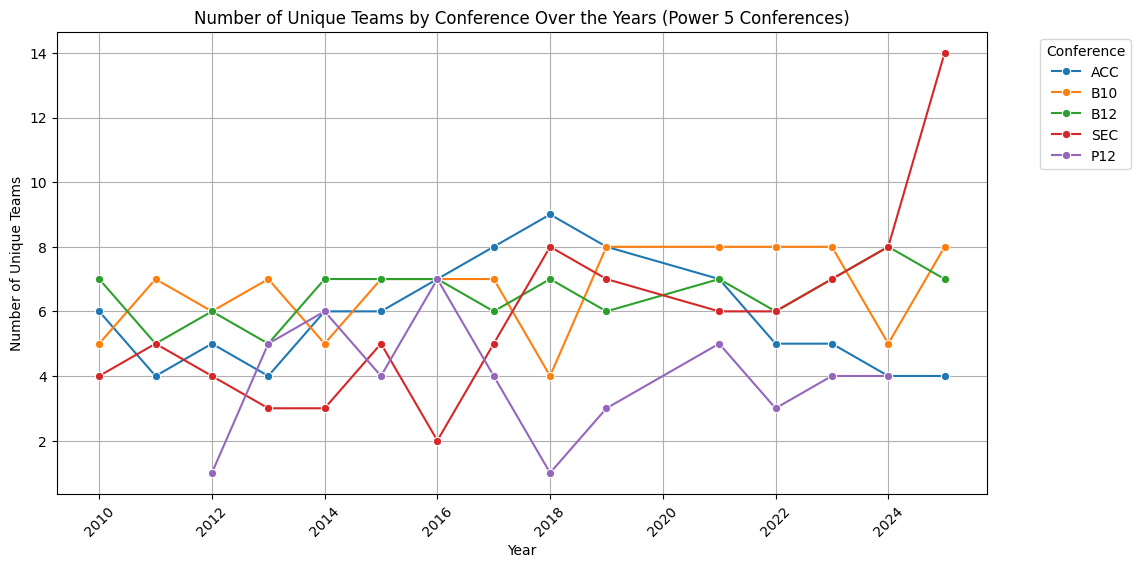

In [82]:
if {'TEAM_1', 'TEAM_2', 'CONF_1', 'CONF_2', 'YEAR'}.issubset(combined_matchups.columns):
    # Reshape data to count unique teams by conference per year
    team_conference_data = pd.concat([
        combined_matchups[['YEAR', 'TEAM_1', 'CONF_1']].rename(columns={'TEAM_1': 'Team', 'CONF_1': 'Conference'}),
        combined_matchups[['YEAR', 'TEAM_2', 'CONF_2']].rename(columns={'TEAM_2': 'Team', 'CONF_2': 'Conference'})
    ])
    
    # Drop duplicates to count unique teams per conference per year
    team_counts = team_conference_data.drop_duplicates(subset=['YEAR', 'Team'])
    team_counts = team_counts.groupby(['YEAR', 'Conference']).size().reset_index(name='Team Count')

    team_counts = team_counts[team_counts['Conference'].isin(['ACC', 'B10', 'B12', 'P12', 'SEC'])]
    
    # Plot using Seaborn
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=team_counts, x='YEAR', y='Team Count', hue='Conference', marker='o')
    plt.xlabel("Year")
    plt.ylabel("Number of Unique Teams")
    plt.title("Number of Unique Teams by Conference Over the Years (Power 5 Conferences)")
    plt.legend(title="Conference", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
else:
    print("Dataset is missing required columns: 'TEAM_1', 'TEAM_2', 'CONF_1', 'CONF_2', or 'YEAR'")


/var/folders/fn/0m355dy57hlgk4fkg7n62xhc0000gp/T/ipykernel_80058/653512295.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_win_rates, x='Seed_Group', y='Win', palette='Blues_r')


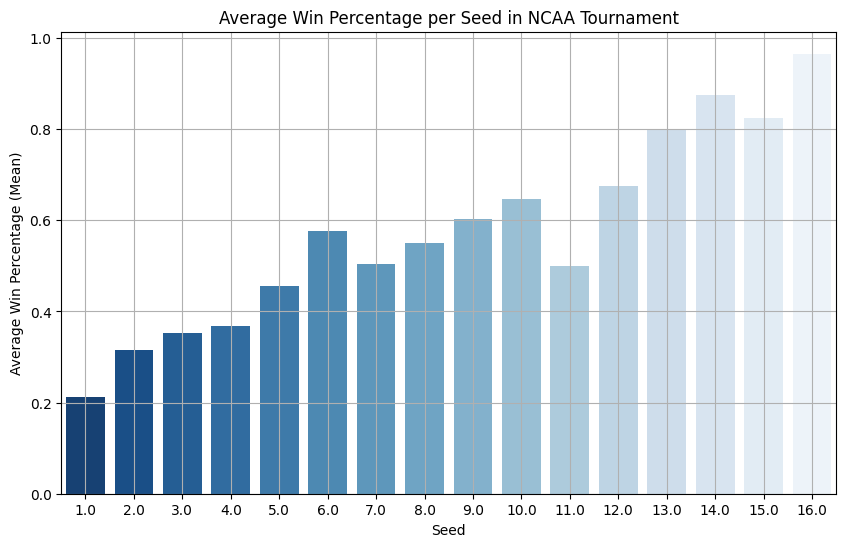

In [83]:
combined_matchups1 = combined_matchups.dropna(subset=['target'])

# Assuming combined_matchups1 is your DataFrame
# Ensure required columns exist
if {'SEED_1', 'SEED_2', 'target'}.issubset(combined_matchups1.columns):
    
    # Create a dataframe for seed and win status for SEED_1
    seed_wins_1 = combined_matchups1[['SEED_1', 'target']].rename(columns={'SEED_1': 'Seed', 'target': 'Win'})
    
    # Create a dataframe for seed and win status for SEED_2
    seed_wins_2 = combined_matchups1[['SEED_2', 'target']].rename(columns={'SEED_2': 'Seed'})
    
    # Adjust win column for SEED_2 (if TEAM_1 won, TEAM_2 lost)
    seed_wins_2['Win'] = 1 - combined_matchups1['target']
    
    # Combine both data sources
    seed_wins = pd.concat([seed_wins_1, seed_wins_2])

    # Group seeds into ranges (1-4, 5-8, 9-12, ...)
    def group_seed(seed):
        return (seed - 1) // 4 + 1
    
    # Apply the grouping to the Seed column
    seed_wins['Seed_Group'] = seed_wins['Seed'].apply(group_seed)

    # Calculate median win percentage per seed group
    median_win_rates = seed_wins.groupby('Seed_Group')['Win'].mean().reset_index()

    # Plot the bar plot using Seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(data=median_win_rates, x='Seed_Group', y='Win', palette='Blues_r')

    # Labels and title
    plt.xlabel("Seed")
    plt.ylabel("Average Win Percentage (Mean)")
    plt.title("Average Win Percentage per Seed in NCAA Tournament")
    plt.grid(True)
    plt.show()
    
else:
    print("Dataset is missing required columns: 'SEED_1', 'SEED_2', or 'target'")



### 5. Challenges and Reflection

So far, the biggest challenge has been to identify how to best use the wealth of data we have curated to address our problem of interest. While this problem was daunting at first, as we began to break down all of the information we had, we were able to make a plan to incorporate the most useful information from multiple sources. As a result, the process of wrangling our data into a useful form was more intensive than for many previous projects.

We also are currently waiting for the end of regular season games from the 2025 season, as well as the announcement of tournament teams and rankings for this years NCAA Championship Tournament. As this data does not yet exist, we are unable to fully dive into the modeling process. This may actually be benificial however, as this will give us more time to carefullly plan out the features needed, and allow us to analyze older data in order to determine the most important features, as well which features don't matter, and as a result, don't need to be created from forthcoming data. 

## Summary Statistics

### Numeric Variables
| Variable | Sample Size | Mean | Std Dev | Min | Q1 | Median | Q3 | Max |
|----------|-------------|------|---------|-----|----|--------|----|-----|
| SCORE_diff | 818 | 4.74 | 13.73 | -29.00 | -5.00 | 4.00 | 14.00 | 47.00 |
| K TEMPO_diff | 888 | 0.03 | 4.12 | -12.70 | -2.71 | -0.08 | 2.92 | 12.11 |
| KADJ T_diff | 888 | -0.01 | 4.00 | -11.88 | -2.60 | -0.15 | 2.77 | 10.70 |
| K OFF_diff | 888 | 2.18 | 6.94 | -18.02 | -2.13 | 1.82 | 6.80 | 21.90 |
| KADJ O_diff | 888 | 3.79 | 7.86 | -18.12 | -1.97 | 3.10 | 8.74 | 27.47 |
| K DEF_diff | 888 | -1.40 | 6.25 | -25.34 | -5.58 | -1.13 | 2.58 | 16.18 |
| KADJ D_diff | 888 | -3.10 | 6.84 | -24.46 | -7.51 | -2.53 | 1.44 | 22.38 |
| KADJ EM_diff | 888 | 6.89 | 11.45 | -30.48 | -0.86 | 5.58 | 13.76 | 45.95 |
| BADJ EM_diff | 888 | 6.97 | 11.56 | -29.80 | -1.23 | 5.45 | 13.90 | 44.30 |
| BADJ O_diff | 888 | 4.02 | 8.32 | -20.60 | -1.70 | 3.58 | 9.53 | 28.54 |
| BADJ D_diff | 888 | -2.95 | 6.48 | -24.40 | -7.10 | -2.48 | 1.20 | 22.20 |
| BARTHAG_diff | 888 | 0.11 | 0.18 | -0.66 | -0.01 | 0.05 | 0.17 | 0.73 |
| GAMES_diff | 888 | 0.58 | 2.53 | -12.00 | -1.00 | 0.00 | 2.00 | 13.00 |
| W_diff | 888 | 1.87 | 4.92 | -12.00 | -1.00 | 2.00 | 5.00 | 22.00 |
| L_diff | 888 | -1.32 | 4.37 | -19.00 | -4.00 | -1.00 | 2.00 | 11.00 |
| WIN%_diff | 888 | 4.73 | 14.01 | -37.50 | -5.20 | 4.29 | 13.62 | 63.33 |
| EFG%_diff | 888 | 0.69 | 3.90 | -11.30 | -2.00 | 0.60 | 3.40 | 14.30 |
| EFG%D_diff | 888 | -0.68 | 3.27 | -12.90 | -2.80 | -0.70 | 1.40 | 9.90 |
| FTR_diff | 888 | -0.36 | 6.26 | -23.30 | -4.40 | -0.20 | 3.90 | 24.50 |
| FTRD_diff | 888 | -1.55 | 7.86 | -28.90 | -7.00 | -1.70 | 3.70 | 28.00 |
| TOV%_diff | 888 | -0.41 | 2.62 | -10.30 | -2.10 | -0.40 | 1.30 | 8.90 |
| TOV%D_diff | 888 | 0.01 | 3.50 | -11.10 | -2.30 | 0.00 | 2.30 | 10.90 |
| OREB%_diff | 888 | 1.22 | 5.63 | -17.20 | -2.40 | 1.35 | 5.03 | 17.80 |
| DREB%_diff | 888 | 0.25 | 4.15 | -14.50 | -2.52 | 0.20 | 3.20 | 12.20 |
| OP OREB%_diff | 888 | -0.25 | 4.15 | -12.20 | -3.20 | -0.20 | 2.52 | 14.50 |
| OP DREB%_diff | 888 | -1.22 | 5.63 | -17.80 | -5.03 | -1.35 | 2.40 | 17.20 |
| RAW T_diff | 888 | 0.02 | 4.11 | -12.40 | -2.70 | -0.05 | 2.90 | 12.00 |
| 2PT%_diff | 888 | 0.78 | 4.28 | -13.40 | -2.10 | 0.70 | 3.50 | 17.90 |
| 2PT%D_diff | 888 | -0.80 | 3.95 | -12.90 | -3.50 | -0.80 | 1.73 | 11.30 |
| 3PT%_diff | 888 | 0.38 | 3.78 | -10.10 | -2.02 | 0.50 | 2.80 | 14.00 |
| 3PT%D_diff | 888 | -0.29 | 2.99 | -9.70 | -2.30 | -0.25 | 1.80 | 8.50 |
| BLK%_diff | 888 | 0.67 | 4.26 | -12.40 | -2.10 | 0.40 | 3.52 | 14.30 |
| BLKED%_diff | 888 | -0.16 | 2.17 | -7.30 | -1.60 | -0.20 | 1.30 | 7.30 |
| AST%_diff | 888 | 1.15 | 7.26 | -22.10 | -3.50 | 1.40 | 5.90 | 23.90 |
| OP AST%_diff | 888 | -0.07 | 7.31 | -23.10 | -4.90 | -0.15 | 4.43 | 23.30 |
| 2PTR_diff | 888 | 0.28 | 6.78 | -19.80 | -4.30 | 0.25 | 5.10 | 22.00 |
| 3PTR_diff | 888 | -0.28 | 6.78 | -22.00 | -5.10 | -0.25 | 4.30 | 19.80 |
| 2PTRD_diff | 888 | 0.11 | 5.24 | -13.50 | -3.50 | 0.10 | 3.70 | 16.00 |
| 3PTRD_diff | 888 | -0.11 | 5.24 | -16.00 | -3.70 | -0.10 | 3.50 | 13.50 |
| BADJ T_diff | 888 | 0.05 | 4.02 | -11.50 | -2.50 | -0.10 | 2.80 | 10.50 |
| AVG HGT_diff | 888 | 0.35 | 1.23 | -3.55 | -0.44 | 0.40 | 1.12 | 5.19 |
| EFF HGT_diff | 888 | 0.36 | 1.51 | -4.32 | -0.64 | 0.38 | 1.33 | 6.36 |
| EXP_diff | 888 | -0.07 | 0.57 | -1.87 | -0.43 | -0.08 | 0.27 | 1.73 |
| TALENT_diff | 888 | 18.08 | 38.04 | -94.31 | -8.96 | 17.96 | 50.61 | 94.60 |
| FT%_diff | 888 | 0.18 | 4.95 | -17.30 | -3.30 | 0.30 | 3.50 | 16.00 |
| OP FT%_diff | 888 | -0.06 | 3.21 | -9.90 | -2.20 | -0.20 | 2.10 | 9.70 |
| PPPO_diff | 888 | 0.02 | 0.07 | -0.18 | -0.02 | 0.02 | 0.07 | 0.23 |
| PPPD_diff | 888 | -0.01 | 0.06 | -0.25 | -0.06 | -0.01 | 0.03 | 0.16 |
| ELITE SOS_diff | 888 | 5.43 | 11.26 | -21.73 | -2.86 | 4.76 | 14.72 | 31.37 |
| WAB_diff | 888 | 3.68 | 6.18 | -17.00 | -0.40 | 3.10 | 7.20 | 25.70 |
| POWER RATING_diff | 435 | 4.87 | 8.27 | -18.20 | -1.20 | 4.50 | 9.80 | 28.20 |
| POWER_diff | 692 | 9.69 | 15.86 | -29.10 | -2.12 | 9.80 | 20.92 | 49.50 |
| PATH_diff | 692 | -4.53 | 8.06 | -31.60 | -9.12 | -3.80 | 1.30 | 13.70 |
| DRAW_diff | 624 | -0.01 | 1.19 | -3.23 | -0.78 | -0.03 | 0.76 | 4.06 |
| WINS_diff | 692 | 0.59 | 2.04 | -5.00 | -1.00 | 1.00 | 2.00 | 6.00 |
| POOL VALUE_diff | 692 | 17.38 | 40.77 | -112.70 | -4.67 | 14.90 | 46.55 | 120.60 |
| POWER-PATH_diff | 692 | 14.21 | 23.61 | -40.50 | -3.45 | 13.55 | 30.12 | 81.10 |
| NET RPI_diff | 888 | -32.29 | 56.47 | -296.00 | -49.00 | -18.00 | 2.00 | 288.00 |
| RESUME_diff | 888 | -44.50 | 74.15 | -324.00 | -88.25 | -22.50 | 6.00 | 270.00 |
| ELO_diff | 888 | -24.45 | 47.56 | -250.00 | -41.00 | -15.50 | 3.25 | 248.00 |
| B POWER_diff | 888 | -36.99 | 62.86 | -296.00 | -63.08 | -18.00 | 3.30 | 269.00 |
| Q1 W_diff | 888 | 2.58 | 4.93 | -11.00 | -1.00 | 3.00 | 6.00 | 17.00 |
| Q2 W_diff | 888 | 1.54 | 3.80 | -12.00 | -1.00 | 2.00 | 4.00 | 13.00 |
| Q1 PLUS Q2 W_diff | 888 | 4.12 | 7.13 | -15.00 | -1.00 | 4.00 | 10.00 | 22.00 |
| Q3 Q4 L_diff | 888 | -1.64 | 3.15 | -16.00 | -3.00 | -1.00 | 0.00 | 14.00 |
| PLUS 500_diff | 888 | 3.34 | 9.12 | -24.00 | -3.00 | 3.00 | 9.00 | 41.00 |
| R SCORE_diff | 888 | 35.32 | 50.20 | -99.30 | 0.00 | 15.45 | 98.30 | 100.00 |
| DUNKS FG%_diff | 888 | 0.59 | 6.10 | -21.10 | -3.70 | 0.75 | 4.40 | 25.80 |
| DUNKS SHARE_diff | 888 | 1.19 | 4.18 | -13.10 | -1.70 | 1.25 | 4.20 | 15.70 |
| DUNKS FG%D_diff | 888 | -0.70 | 6.97 | -20.80 | -5.30 | -0.70 | 3.62 | 19.50 |
| DUNKS D SHARE_diff | 888 | 0.21 | 2.04 | -5.40 | -1.20 | 0.30 | 1.60 | 7.20 |
| CLOSE TWOS FG%_diff | 888 | 1.80 | 5.63 | -19.10 | -2.10 | 1.70 | 5.30 | 24.10 |
| CLOSE TWOS SHARE_diff | 888 | -0.42 | 6.76 | -27.60 | -4.80 | -0.30 | 4.03 | 23.60 |
| CLOSE TWOS FG%D_diff | 888 | 0.01 | 5.84 | -20.00 | -3.73 | -0.05 | 3.90 | 26.70 |
| CLOSE TWOS D SHARE_diff | 888 | -1.32 | 5.63 | -21.50 | -4.90 | -1.35 | 2.23 | 19.00 |
| FARTHER TWOS FG%_diff | 888 | 0.12 | 4.72 | -14.10 | -3.20 | 0.20 | 3.30 | 15.50 |
| FARTHER TWOS SHARE_diff | 888 | 0.72 | 8.10 | -27.60 | -4.70 | 0.60 | 6.00 | 29.40 |
| FARTHER TWOS FG%D_diff | 888 | -0.82 | 4.04 | -14.60 | -3.42 | -0.80 | 2.00 | 10.80 |
| FARTHER TWOS D SHARE_diff | 888 | 1.40 | 6.25 | -21.20 | -3.00 | 1.10 | 5.60 | 23.40 |
| THREES FG%_diff | 888 | 0.41 | 3.68 | -10.00 | -2.00 | 0.50 | 2.73 | 13.50 |
| THREES SHARE_diff | 888 | -0.29 | 6.80 | -23.40 | -5.12 | -0.30 | 4.30 | 20.10 |
| THREES FG%D_diff | 888 | -0.31 | 2.87 | -10.60 | -2.12 | -0.20 | 1.60 | 8.50 |
| THREES D SHARE_diff | 888 | -0.08 | 5.22 | -15.40 | -3.52 | 0.00 | 3.50 | 13.50 |

### Categorical Variables
#### YEAR
Sample Size: 888

| Category | Count |
|----------|-------|
| 2024 | 70 |
| 2023 | 63 |
| 2022 | 63 |
| 2019 | 63 |
| 2018 | 63 |
| 2017 | 63 |
| 2016 | 63 |
| 2015 | 63 |
| 2014 | 63 |
| 2013 | 63 |
| 2012 | 63 |
| 2011 | 63 |
| 2010 | 63 |
| 2021 | 62 |

#### ROUND
Sample Size: 888

| Category | Count |
|----------|-------|
| 64 | 447 |
| 32 | 238 |
| 16 | 112 |
| 8 | 52 |
| 4 | 26 |
| 2 | 13 |

#### CONF_1
Sample Size: 888

| Category | Count |
|----------|-------|
| B12 | 131 |
| B10 | 130 |
| ACC | 128 |
| BE | 118 |
| SEC | 112 |
| P12 | 62 |
| WCC | 42 |
| MWC | 35 |
| A10 | 34 |
| Amer | 27 |
| MVC | 21 |
| P10 | 10 |
| Horz | 7 |
| CUSA | 6 |
| CAA | 6 |
| OVC | 5 |
| Ivy | 3 |
| MAC | 2 |
| SC | 2 |
| BSth | 1 |
| AE | 1 |
| SB | 1 |
| Slnd | 1 |
| Sum | 1 |
| NEC | 1 |
| WAC | 1 |

#### CONF_2
Sample Size: 888

| Category | Count |
|----------|-------|
| B10 | 96 |
| ACC | 89 |
| B12 | 80 |
| SEC | 71 |
| BE | 71 |
| P12 | 46 |
| A10 | 33 |
| MWC | 29 |
| Amer | 24 |
| WCC | 23 |
| CUSA | 20 |
| MVC | 20 |
| MAC | 18 |
| Horz | 17 |
| Ivy | 17 |
| CAA | 17 |
| MAAC | 16 |
| BW | 16 |
| Sum | 16 |
| ASun | 15 |
| WAC | 15 |
| Pat | 15 |
| SC | 14 |
| AE | 14 |
| OVC | 14 |
| Slnd | 13 |
| SB | 13 |
| BSth | 13 |
| BSky | 13 |
| MEAC | 11 |
| NEC | 8 |
| SWAC | 8 |
| P10 | 3 |

## Correlation Matrix and Heatmap

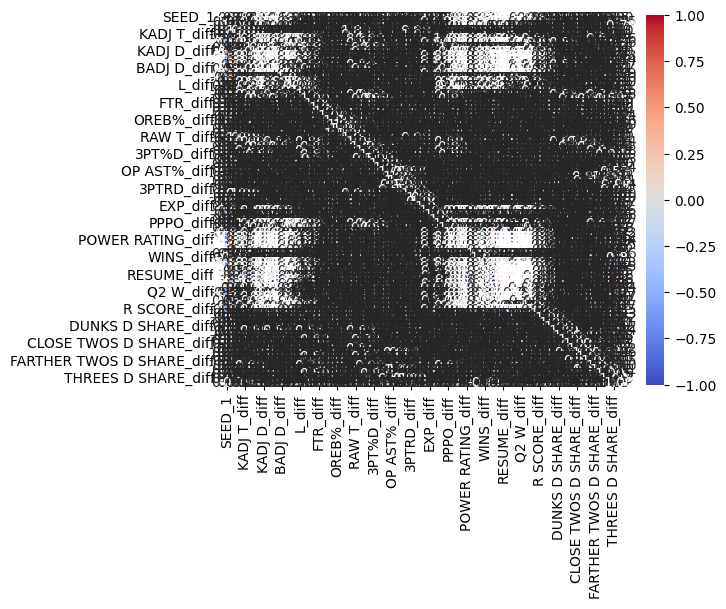

In [84]:
corr_matrix = combined_matchups[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [85]:
print(corr_matrix)

                       SEED_1    SEED_2  SCORE_diff  K TEMPO_diff  \
SEED_1               1.000000 -0.313149   -0.377914     -0.075058   
SEED_2              -0.313149  1.000000    0.421013      0.038177   
SCORE_diff          -0.377914  0.421013    1.000000     -0.012944   
K TEMPO_diff        -0.075058  0.038177   -0.012944      1.000000   
KADJ T_diff         -0.063041  0.032612   -0.019767      0.976247   
...                       ...       ...         ...           ...   
THREES FG%_diff     -0.146632  0.110062    0.151459     -0.034677   
THREES SHARE_diff    0.014128 -0.012539    0.049061     -0.084042   
THREES FG%D_diff     0.194045 -0.135610   -0.172675     -0.028510   
THREES D SHARE_diff  0.049928  0.024506   -0.045183     -0.025814   
target               0.297835 -0.347718   -0.790313      0.004697   

                     KADJ T_diff  K OFF_diff  KADJ O_diff  K DEF_diff  \
SEED_1                 -0.063041   -0.426924    -0.549059    0.340064   
SEED_2                  0

## Supervised Learning

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import pkg_resources
from hyperopt import fmin, tpe, hp, Trials
import shap
from hyperopt import fmin, tpe, hp, Trials



In [87]:
display(combined_matchups)

,YEAR,ROUND,CONF_1,TEAM_1,SEED_1,SEED_2,CONF_2,TEAM_2,SCORE_diff,K TEMPO_diff,...,CLOSE TWOS D SHARE_diff,FARTHER TWOS FG%_diff,FARTHER TWOS SHARE_diff,FARTHER TWOS FG%D_diff,FARTHER TWOS D SHARE_diff,THREES FG%_diff,THREES SHARE_diff,THREES FG%D_diff,THREES D SHARE_diff,target
0,2025,64,SEC,Auburn,1.0,64.0,SWAC,Alabama St.,NaN,-0.200,...,2.5,13.4,1.7,-3.6,2.2,3.9,-2.3,-4.2,-4.7,NaN
1,2025,64,SEC,Auburn,1.0,64.0,NEC,Saint Francis,NaN,2.208,...,6.9,1.7,0.1,-8.4,1.5,3.4,-1.3,-3.1,-8.4,NaN
2,2025,64,ACC,Louisville,32.0,33.0,BE,Creighton,NaN,1.390,...,-0.6,-0.9,1.6,-1.4,-3.9,-0.9,-0.9,1.0,4.5,NaN
3,2025,64,B10,Michigan,17.0,48.0,BW,UC San Diego,NaN,3.775,...,-5.8,4.7,1.3,2.5,11.3,-3.1,-7.1,-1.8,-5.4,NaN
4,2025,64,SEC,Texas A&M,16.0,49.0,Ivy,Yale,NaN,-1.349,...,-1.1,-13.7,-2.3,-1.7,2.2,-7.4,5.6,-0.3,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,2010,8,SEC,Kentucky,3.0,6.0,BE,West Virginia,-7.0,6.214,...,-3.8,0.1,-3.7,-2.6,1.6,-0.5,-3.0,-1.0,2.2,1.0
947,2010,8,ACC,Duke,2.0,10.0,B12,Baylor,7.0,0.265,...,12.3,-6.6,-0.9,-3.9,-3.2,0.3,0.6,-5.4,-9.1,0.0
948,2010,4,B10,Michigan St.,17.0,20.0,Horz,Butler,-2.0,2.311,...,-0.5,3.5,13.1,4.4,-4.7,0.2,-13.6,1.4,5.3,1.0
949,2010,4,BE,West Virginia,6.0,2.0,ACC,Duke,-21.0,-3.704,...,1.0,3.5,-2.1,2.3,-7.9,-4.6,1.7,4.1,6.9,1.0


In [88]:
print(combined_matchups.columns)

Index(['YEAR', 'ROUND', 'CONF_1', 'TEAM_1', 'SEED_1', 'SEED_2', 'CONF_2',
       'TEAM_2', 'SCORE_diff', 'K TEMPO_diff', 'KADJ T_diff', 'K OFF_diff',
       'KADJ O_diff', 'K DEF_diff', 'KADJ D_diff', 'KADJ EM_diff',
       'BADJ EM_diff', 'BADJ O_diff', 'BADJ D_diff', 'BARTHAG_diff',
       'GAMES_diff', 'W_diff', 'L_diff', 'WIN%_diff', 'EFG%_diff',
       'EFG%D_diff', 'FTR_diff', 'FTRD_diff', 'TOV%_diff', 'TOV%D_diff',
       'OREB%_diff', 'DREB%_diff', 'OP OREB%_diff', 'OP DREB%_diff',
       'RAW T_diff', '2PT%_diff', '2PT%D_diff', '3PT%_diff', '3PT%D_diff',
       'BLK%_diff', 'BLKED%_diff', 'AST%_diff', 'OP AST%_diff', '2PTR_diff',
       '3PTR_diff', '2PTRD_diff', '3PTRD_diff', 'BADJ T_diff', 'AVG HGT_diff',
       'EFF HGT_diff', 'EXP_diff', 'TALENT_diff', 'FT%_diff', 'OP FT%_diff',
       'PPPO_diff', 'PPPD_diff', 'ELITE SOS_diff', 'WAB_diff',
       'POWER RATING_diff', 'POWER_diff', 'PATH_diff', 'DRAW_diff',
       'WINS_diff', 'POOL VALUE_diff', 'POWER-PATH_diff', 'NET RPI

In [89]:
X = combined_matchups[['SEED_1', 'SEED_2', 'K TEMPO_diff', 'KADJ T_diff', 'K OFF_diff',
       'KADJ O_diff', 'K DEF_diff', 'KADJ D_diff', 'KADJ EM_diff',
       'BADJ EM_diff', 'BADJ O_diff', 'BADJ D_diff', 'BARTHAG_diff',
        'WIN%_diff', 'EFG%_diff',
       'EFG%D_diff', 'FTR_diff', 'FTRD_diff', 'TOV%_diff', 'TOV%D_diff',
       'OREB%_diff', 'DREB%_diff', 'OP OREB%_diff', 'OP DREB%_diff',
       'RAW T_diff', '2PT%_diff', '2PT%D_diff', '3PT%_diff', '3PT%D_diff',
       'BLK%_diff', 'BLKED%_diff', 'AST%_diff', 'OP AST%_diff', '2PTR_diff',
       '3PTR_diff', '2PTRD_diff', '3PTRD_diff', 'BADJ T_diff', 'AVG HGT_diff',
       'EFF HGT_diff', 'EXP_diff', 'TALENT_diff', 'FT%_diff', 'OP FT%_diff',
       'PPPO_diff', 'PPPD_diff', 'ELITE SOS_diff', 'WAB_diff', 'NET RPI_diff',
       'RESUME_diff', 'ELO_diff', 'B POWER_diff', 'Q1 W_diff', 'Q2 W_diff',
       'Q1 PLUS Q2 W_diff', 'Q3 Q4 L_diff', 'PLUS 500_diff', 'R SCORE_diff']]
y = combined_matchups['target']

train_mask = ~combined_matchups['YEAR'].isin([2020, 2021, 2022, 2023, 2024, 2025])
test_mask = combined_matchups['YEAR'].isin([2020, 2021, 2022, 2023, 2024])
new_mask = (combined_matchups['YEAR'] == 2025) & (combined_matchups['ROUND'] == 64)

X_train = X[train_mask]
X_test = X[test_mask]
y_train = y[train_mask]
y_test = y[test_mask]
X_new = X[new_mask]

In [90]:
display(X_new)

,SEED_1,SEED_2,K TEMPO_diff,KADJ T_diff,K OFF_diff,KADJ O_diff,K DEF_diff,KADJ D_diff,KADJ EM_diff,BADJ EM_diff,...,NET RPI_diff,RESUME_diff,ELO_diff,B POWER_diff,Q1 W_diff,Q2 W_diff,Q1 PLUS Q2 W_diff,Q3 Q4 L_diff,PLUS 500_diff,R SCORE_diff
0,1.0,64.0,-0.200,-0.156,17.016,27.051,-3.402,-17.223,44.274,44.487,...,-272.0,-264.0,-191.0,-271.0,15.0,7.0,22.0,-9.0,19.0,99.95
1,1.0,64.0,2.208,0.671,20.765,28.782,-7.128,-19.018,47.799,47.505,...,-295.0,-286.0,-236.0,-303.0,15.0,7.0,22.0,-12.0,24.0,99.95
2,32.0,33.0,1.390,1.719,2.639,1.209,-2.553,-2.735,3.944,4.590,...,-16.0,6.0,-19.0,-8.7,-1.0,5.0,4.0,0.0,6.0,5.62
3,17.0,48.0,3.775,3.875,-5.908,1.497,7.056,-1.546,3.043,4.211,...,-11.0,-60.0,4.0,-18.7,10.0,2.0,12.0,-2.0,-10.0,37.22
4,16.0,49.0,-1.349,-1.183,-7.745,1.837,-1.975,-11.300,13.137,12.364,...,-54.0,-114.0,-18.0,-53.0,7.0,7.0,14.0,-5.0,-1.0,99.32
5,24.0,41.0,3.159,1.992,5.710,8.049,6.246,2.250,5.799,5.895,...,-24.0,-38.0,-20.0,-23.0,5.0,0.0,5.0,-1.0,-1.0,37.83
6,24.0,41.0,-1.436,-2.402,-2.794,-1.016,-2.598,-3.552,2.536,1.425,...,-8.0,-56.0,-12.0,-3.0,7.0,-3.0,4.0,-1.0,2.0,60.68
7,9.0,56.0,2.181,2.691,-1.668,6.772,-4.215,-10.743,17.514,19.852,...,-75.0,-123.0,-44.0,-88.7,9.0,6.0,15.0,-5.0,1.0,99.71
8,25.0,40.0,-4.780,-5.115,3.522,5.150,3.760,0.891,4.260,3.304,...,-14.0,-16.0,16.0,-17.0,2.0,0.0,2.0,-2.0,-6.0,20.23
9,8.0,57.0,-3.913,-4.743,2.917,11.331,-4.510,-15.057,26.389,24.584,...,-128.0,-200.0,-104.0,-133.6,13.0,5.0,18.0,-7.0,11.0,99.89


In [91]:
proportion_ones = y_train.mean()
print(f"Proportion of 1's in y_train: {proportion_ones:.3f}")

Proportion of 1's in y_train: 0.381


In [92]:
proportion_ones = y_test.mean()
print(f"Proportion of 1's in y_test: {proportion_ones:.3f}")

Proportion of 1's in y_test: 0.390


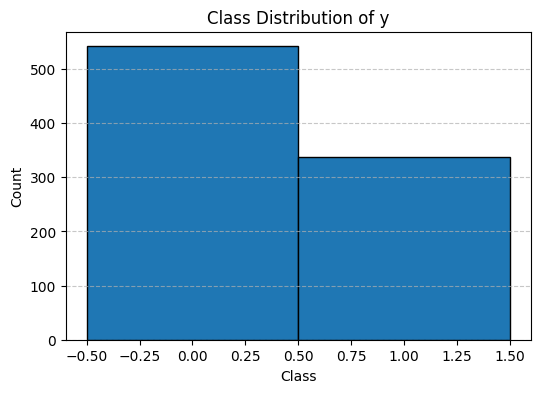

In [93]:
plt.figure(figsize=(6,4))
plt.hist(y, bins=np.arange(y.min(), y.max()+2)-0.5, edgecolor='black')
plt.title('Class Distribution of y')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

A target value of 0 means an upset, although this is based on overall tournament seeding. So if the 4th seeded 1 seed beat the number 1 overall seed, it would still be an upset. It looks like about 5/8 (62.5%) of our results go according to tournament seeding, so any model that performs worse than this isn't great.

In [94]:
null_percentages = (X.isnull().mean() * 100)
null_percentages = null_percentages[null_percentages > 0]

print(null_percentages.sort_values(ascending=False))

Series([], dtype: float64)


Okay so no null values in our features so that's good. Next we'll scale our features so that nothing is thrown off for any distance-based models.

In [95]:
# Define the scaling pipeline
scaling_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Fit and transform scaling on the training data, transform on test data
X_train_scaled = scaling_pipeline.fit_transform(X_train)
X_test_scaled = scaling_pipeline.transform(X_test)
X_new_scaled = scaling_pipeline.transform(X_new)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)
X_new_scaled = pd.DataFrame(X_new_scaled, columns=X_train.columns)


In [96]:
# Define the hyperparameter distribution
param_dist = {
    'C': np.logspace(-3, 3, 7),  # Random values from 0.001 to 1000
}

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(logreg, param_dist, n_iter=10, cv=5, scoring='f1_weighted', random_state=42, n_jobs=-1)

# Fit the randomized search to the training data
random_search.fit(X_train_scaled, y_train)

# Get the best parameter and model
best_params = random_search.best_params_
best_logreg = random_search.best_estimator_

# Predict on train set
y_train_pred_logreg = best_logreg.predict(X_train_scaled)
y_train_prob_logreg = best_logreg.predict_proba(X_train_scaled)[:, 1]

# Compute train metrics
train_accuracy = accuracy_score(y_train, y_train_pred_logreg)
train_f1 = f1_score(y_train, y_train_pred_logreg)
train_roc_auc = roc_auc_score(y_train, y_train_prob_logreg)
train_conf_matrix = confusion_matrix(y_train, y_train_pred_logreg)

# Predict on test set
y_test_pred_logreg = best_logreg.predict(X_test_scaled)
y_test_prob_logreg = best_logreg.predict_proba(X_test_scaled)[:, 1]

# Compute test metrics
test_accuracy = accuracy_score(y_test, y_test_pred_logreg)
test_f1 = f1_score(y_test, y_test_pred_logreg)
test_roc_auc = roc_auc_score(y_test, y_test_prob_logreg)
test_conf_matrix = confusion_matrix(y_test, y_test_pred_logreg)

# Display results
print("=== Tuned Logistic Regression Results (Randomized Search) ===")
print(f"Best Parameters: {best_params}\n")

print("--- Train Set ---")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC AUC: {train_roc_auc:.4f}")
print("Confusion Matrix:\n", train_conf_matrix, "\n")

print("--- Test Set ---")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"ROC AUC: {test_roc_auc:.4f}")
print("Confusion Matrix:\n", test_conf_matrix)


/Users/kolbytaylor/Documents/BYU/Winter 2025/Stat 486/March-Madness/.venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


=== Tuned Logistic Regression Results (Randomized Search) ===
Best Parameters: {'C': np.float64(0.01)}

--- Train Set ---
Accuracy: 0.7397
F1 Score: 0.6273
ROC AUC: 0.7993
Confusion Matrix:
 [[328  62]
 [102 138]] 

--- Test Set ---
Accuracy: 0.6867
F1 Score: 0.5301
ROC AUC: 0.7142
Confusion Matrix:
 [[127  25]
 [ 53  44]]


In [97]:
# Define the parameter distribution
param_dist = {
    'n_neighbors': np.arange(20, 50),  # Trying neighbors from 1 to 20
    'weights': ['uniform', 'distance'],  # Weights for neighbors
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metrics
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=20, cv=5, scoring='f1_weighted', random_state=42, n_jobs=-1)

# Fit the randomized search to the training data
random_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
best_knn = random_search.best_estimator_

# Predict on train set
y_train_pred_knn = best_knn.predict(X_train_scaled)
y_train_prob_knn = best_knn.predict_proba(X_train_scaled)[:, 1]

# Compute train metrics
train_accuracy = accuracy_score(y_train, y_train_pred_knn)
train_f1 = f1_score(y_train, y_train_pred_knn)
train_roc_auc = roc_auc_score(y_train, y_train_prob_knn)
train_conf_matrix = confusion_matrix(y_train, y_train_pred_knn)

# Predict on test set
y_test_pred_knn = best_knn.predict(X_test_scaled)
y_test_prob_knn = best_knn.predict_proba(X_test_scaled)[:, 1]

# Compute test metrics
test_accuracy = accuracy_score(y_test, y_test_pred_knn)
test_f1 = f1_score(y_test, y_test_pred_knn)
test_roc_auc = roc_auc_score(y_test, y_test_prob_knn)
test_conf_matrix = confusion_matrix(y_test, y_test_pred_knn)

# Display results
print("=== Tuned KNN Classification Results (Randomized Search) ===")
print(f"Best Parameters: {best_params}\n")

print("--- Train Set ---")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC AUC: {train_roc_auc:.4f}")
print("Confusion Matrix:\n", train_conf_matrix, "\n")

print("--- Test Set ---")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"ROC AUC: {test_roc_auc:.4f}")
print("Confusion Matrix:\n", test_conf_matrix)

=== Tuned KNN Classification Results (Randomized Search) ===
Best Parameters: {'weights': 'uniform', 'n_neighbors': np.int64(49), 'metric': 'manhattan'}

--- Train Set ---
Accuracy: 0.7111
F1 Score: 0.6078
ROC AUC: 0.7663
Confusion Matrix:
 [[307  83]
 [ 99 141]] 

--- Test Set ---
Accuracy: 0.6506
F1 Score: 0.5348
ROC AUC: 0.7067
Confusion Matrix:
 [[112  40]
 [ 47  50]]


In [98]:
# Define the parameter distribution
param_dist = {
    'C': np.logspace(-3, 3, 7),  # Searching C from 0.001 to 1000
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Different types of kernels
    'gamma': ['scale', 'auto'] + np.logspace(-3, 3, 7).tolist(),  # Different gamma values (including scale and auto)
    'degree': np.arange(1, 6)  # Only used for polynomial kernel
}

# Initialize SVM classifier
svm = SVC(random_state=42)

# Initialize RandomizedSearchCV
random_search_svm = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=20, cv=5, scoring='f1_weighted', random_state=42, n_jobs=-1)

# Fit the randomized search to the training data
random_search_svm.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params_svm = random_search_svm.best_params_
best_svm = random_search_svm.best_estimator_

# Predict on train set
y_train_pred_svm = best_svm.predict(X_train_scaled)
y_train_prob_svm = best_svm.decision_function(X_train_scaled)

# Compute train metrics
train_accuracy = accuracy_score(y_train, y_train_pred_svm)
train_f1 = f1_score(y_train, y_train_pred_svm)
train_roc_auc = roc_auc_score(y_train, y_train_prob_svm)
train_conf_matrix = confusion_matrix(y_train, y_train_pred_svm)

# Predict on test set
y_test_pred_svm = best_svm.predict(X_test_scaled)
y_test_prob_svm = best_svm.decision_function(X_test_scaled)

# Compute test metrics
test_accuracy = accuracy_score(y_test, y_test_pred_svm)
test_f1 = f1_score(y_test, y_test_pred_svm)
test_roc_auc = roc_auc_score(y_test, y_test_prob_svm)
test_conf_matrix = confusion_matrix(y_test, y_test_pred_svm)

# Display results
print("=== Tuned SVM Classification Results (Randomized Search) ===")
print(f"Best Parameters: {best_params_svm}\n")

print("--- Train Set ---")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC AUC: {train_roc_auc:.4f}")
print("Confusion Matrix:\n", train_conf_matrix, "\n")

print("--- Test Set ---")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"ROC AUC: {test_roc_auc:.4f}")
print("Confusion Matrix:\n", test_conf_matrix)

=== Tuned SVM Classification Results (Randomized Search) ===
Best Parameters: {'kernel': 'poly', 'gamma': 'scale', 'degree': np.int64(1), 'C': np.float64(0.1)}

--- Train Set ---
Accuracy: 0.7190
F1 Score: 0.5893
ROC AUC: 0.7913
Confusion Matrix:
 [[326  64]
 [113 127]] 

--- Test Set ---
Accuracy: 0.6867
F1 Score: 0.5185
ROC AUC: 0.7147
Confusion Matrix:
 [[129  23]
 [ 55  42]]


In [99]:
# Define the parameter distribution
param_dist_rf = {
    'n_estimators': np.arange(10, 50, 10),  # Number of trees (from 10 to 140)
    'max_depth': list(np.arange(2, 10, 1)),  # Max depth of trees (from 2 to 19)
    'min_samples_split': np.arange(2, 21),  # Minimum samples required to split (from 2 to 20)
    'min_samples_leaf': np.arange(1, 21),  # Minimum samples required to be at a leaf node (from 1 to 20)
    'bootstrap': [True, False],  # Whether bootstrap samples are used
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=30, cv=5, scoring='f1_weighted', random_state=42, n_jobs=-1)

# Fit the randomized search to the training data
random_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params_rf = random_search_rf.best_params_
best_rf = random_search_rf.best_estimator_

# Predict on train set
y_train_pred_rf = best_rf.predict(X_train_scaled)
y_train_prob_rf = best_rf.predict_proba(X_train_scaled)[:, 1]

# Compute train metrics
train_accuracy = accuracy_score(y_train, y_train_pred_rf)
train_f1 = f1_score(y_train, y_train_pred_rf)
train_roc_auc = roc_auc_score(y_train, y_train_prob_rf)
train_conf_matrix = confusion_matrix(y_train, y_train_pred_rf)

# Predict on test set
y_test_pred_rf = best_rf.predict(X_test_scaled)
y_test_prob_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

# Compute test metrics
test_accuracy = accuracy_score(y_test, y_test_pred_rf)
test_f1 = f1_score(y_test, y_test_pred_rf)
test_roc_auc = roc_auc_score(y_test, y_test_prob_rf)
test_conf_matrix = confusion_matrix(y_test, y_test_pred_rf)

# Display results
print("=== Tuned Random Forest Classification Results (Randomized Search) ===")
print(f"Best Parameters: {best_params_rf}\n")

print("--- Train Set ---")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC AUC: {train_roc_auc:.4f}")
print("Confusion Matrix:\n", train_conf_matrix, "\n")

print("--- Test Set ---")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"ROC AUC: {test_roc_auc:.4f}")
print("Confusion Matrix:\n", test_conf_matrix)

=== Tuned Random Forest Classification Results (Randomized Search) ===
Best Parameters: {'n_estimators': np.int64(40), 'min_samples_split': np.int64(11), 'min_samples_leaf': np.int64(3), 'max_features': 'sqrt', 'max_depth': np.int64(8), 'bootstrap': True}

--- Train Set ---
Accuracy: 0.9095
F1 Score: 0.8795
ROC AUC: 0.9717
Confusion Matrix:
 [[365  25]
 [ 32 208]] 

--- Test Set ---
Accuracy: 0.6787
F1 Score: 0.5652
ROC AUC: 0.7155
Confusion Matrix:
 [[117  35]
 [ 45  52]]


In [100]:
# Prepare the data in DMatrix format (XGBoost-specific format)
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Define the search space for hyperparameters using hyperopt
search_space = {
    'max_depth': hp.randint('max_depth', 3, 8),  # Max depth between 3 and 10
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),  # Learning rate between 0.01 and 0.2
    'subsample': hp.uniform('subsample', 0.6, 1.0),  # Subsample between 0.6 and 1.0
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),  # Fraction of features between 0.6 and 1.0
    'alpha': hp.uniform('alpha', 0.1, 1.0),  # L1 regularization strength
    'min_child_weight': hp.randint('min_child_weight', 1, 10),  # Min child weight between 1 and 10
    'scale_pos_weight': hp.uniform('scale_pos_weight', 1, 10)  # For handling class imbalance
}

# Define the objective function for hyperopt to minimize
def objective(params):
    # Add fixed parameters that are not part of the hyperparameter space
    params['objective'] = 'binary:logistic'  # Binary classification
    params['eval_metric'] = 'logloss'  # Logloss evaluation metric

    # Set up evaluation list for early stopping
    evallist = [(dtest, 'eval')]

    # Train the model with early stopping
    bst = xgb.train(
        params,
        dtrain,
        num_boost_round=1000,
        evals=evallist,
        early_stopping_rounds=20,
        verbose_eval=False  # Set to False to reduce output during training,
    )

    # Get the best iteration from early stopping
    best_iteration = bst.best_iteration

    # Predict on the test set using the best model from early stopping
    y_test_pred_xgb = bst.predict(dtest, iteration_range=(0, best_iteration))
    y_test_pred_binary = (y_test_pred_xgb > 0.5).astype(int)  # Convert probabilities to binary predictions
    y_test_prob_xgb = y_test_pred_xgb  # Probabilities for ROC AUC

    # Compute test metrics
    test_accuracy = accuracy_score(y_test, y_test_pred_binary)
    test_f1 = f1_score(y_test, y_test_pred_binary)
    test_roc_auc = roc_auc_score(y_test, y_test_prob_xgb)

    # We want to minimize the negative ROC AUC score for hyperopt
    return {'loss': -test_accuracy, 'status': 'ok'}

# Set up trials object to track the search progress
trials = Trials()

# Run the optimization with hyperopt's tree-structured Parzen estimator (TPE)
best = fmin(fn=objective,
            space=search_space,
            algo=tpe.suggest,
            max_evals=50,  # Number of evaluations to perform
            trials=trials)

# Print the best hyperparameters found by hyperopt
print("Best Hyperparameters:", best)

# Now, let's retrain the model with the best hyperparameters found
best_params = {key: best[key] for key in best}
best_params['objective'] = 'binary:logistic'
best_params['eval_metric'] = 'logloss'

# Retrain the model with the best parameters found
bst_final = xgb.train(
    best_params,
    dtrain,
    num_boost_round=1000,
    evals=[(dtest, 'eval')],
    early_stopping_rounds=20,
    verbose_eval=10
)

# Get the best iteration from early stopping
best_iteration_final = bst_final.best_iteration

# Predict on the train set for additional metrics
y_train_pred_xgb = bst_final.predict(dtrain, iteration_range=(0, best_iteration_final))
y_train_pred_binary = (y_train_pred_xgb > 0.5).astype(int)
y_train_prob_xgb = y_train_pred_xgb  # Probabilities for ROC AUC

# Compute train metrics
train_accuracy = accuracy_score(y_train, y_train_pred_binary)
train_f1 = f1_score(y_train, y_train_pred_binary)
train_roc_auc = roc_auc_score(y_train, y_train_prob_xgb)
train_conf_matrix = confusion_matrix(y_train, y_train_pred_binary)


# Predict on the test set using the best model
y_test_pred_xgb = bst_final.predict(dtest, iteration_range=(0, best_iteration_final))
y_test_pred_binary = (y_test_pred_xgb > 0.5).astype(int)
y_test_prob_xgb = y_test_pred_xgb  # Probabilities for ROC AUC

# Compute test metrics
test_accuracy = accuracy_score(y_test, y_test_pred_binary)
test_f1 = f1_score(y_test, y_test_pred_binary)
test_roc_auc = roc_auc_score(y_test, y_test_prob_xgb)
test_conf_matrix = confusion_matrix(y_test, y_test_pred_binary)

# Display results
print("\n=== Tuned XGBoost Classification Results (Hyperopt + Early Stopping) ===")
print(f"Best Iteration: {best_iteration_final}\n")

# Display train results
print("--- Train Set ---")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC AUC: {train_roc_auc:.4f}")
print("Confusion Matrix:\n", train_conf_matrix)

print("--- Test Set ---")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"ROC AUC: {test_roc_auc:.4f}")
print("Confusion Matrix:\n", test_conf_matrix)


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 50/50 [00:08<00:00,  6.14trial/s, best loss: -0.6746987951807228]
Best Hyperparameters: {'alpha': np.float64(0.20334668042163317), 'colsample_bytree': np.float64(0.8526693508362392), 'learning_rate': np.float64(0.12174497416515159), 'max_depth': np.int64(5), 'min_child_weight': np.int64(6), 'scale_pos_weight': np.float64(1.2450024983427996), 'subsample': np.float64(0.8688751492627144)}
[0]	eval-logloss:0.65452
[10]	eval-logloss:0.60554
[20]	eval-logloss:0.61519
[30]	eval-logloss:0.63360
[31]	eval-logloss:0.63778

=== Tuned XGBoost Classification Results (Hyperopt + Early Stopping) ===
Best Iteration: 11

--- Train Set ---
Accuracy: 0.8571
F1 Score: 0.8148
ROC AUC: 0.9344
Confusion Matrix:
 [[342  48]
 [ 42 198]]
--- Test Set ---
Accuracy: 0.6747
F1 Score: 0.5759
ROC AUC: 0.7073
Confusion Matrix:
 [[113  39]
 [ 42  55]]


## Explainability and Interpretability

In [157]:
# Create a SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(bst_final)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_scaled)

# Plot the SHAP summary for the positive class (class 1)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, max_display=5, show=False)

plt.savefig('Plots/beeswarm.png', dpi=72, bbox_inches="tight")
plt.close()


In [102]:
# Get the feature importance based on gain (mean improvement in the model's loss function)
feature_importance = bst_final.get_score(importance_type='gain')

# Convert it to a DataFrame for easier manipulation and sorting
importance_df = pd.DataFrame(list(feature_importance.items()), columns=["Feature", "Gain"])

# Sort the features by gain in descending order
importance_df = importance_df.sort_values(by="Gain", ascending=False)

# Plot the top 10 features by gain
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"].head(10), importance_df["Gain"].head(10), color='teal')
plt.xlabel('Gain (Feature Importance)')
plt.title('Top 10 Features by Gain Importance')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.savefig('Plots/gain.png', dpi=72, bbox_inches="tight")
plt.close()
plt.show()

In [103]:
# Get the feature importance based on gain (mean improvement in the model's loss function)
feature_importance = bst_final.get_score(importance_type='weight')

# Convert it to a DataFrame for easier manipulation and sorting
importance_df = pd.DataFrame(list(feature_importance.items()), columns=["Feature", "Weight"])

# Sort the features by gain in descending order
importance_df = importance_df.sort_values(by="Weight", ascending=False)

# Plot the top 10 features by gain
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"].head(10), importance_df["Weight"].head(10), color='maroon')
plt.xlabel('Weight (Feature Importance)')
plt.title('Top 10 Features by Weight Importance')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.savefig('Plots/weight.png', dpi=72, bbox_inches="tight")
plt.close()
plt.show()

## Predicting on 2025

In [158]:
predictions_df = combined_matchups[(combined_matchups['YEAR'] == 2025) & (combined_matchups['ROUND'] == 64)]

# Make probability predictions (use xgb.DMatrix for more efficient prediction)
dmat = xgb.DMatrix(X_new_scaled)  # Convert to DMatrix
predictions_df['probabilities'] = bst_final.predict(dmat, iteration_range=(0, best_iteration_final))

# Make class predictions (binary)
predictions_df['predictions'] = (predictions_df['probabilities'] > 0.5).astype(int)  # Threshold the probabilities for class prediction


display(predictions_df[['TEAM_1', 'TEAM_2', 'probabilities', 'predictions']])

/var/folders/fn/0m355dy57hlgk4fkg7n62xhc0000gp/T/ipykernel_80058/1718653796.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions_df['probabilities'] = bst_final.predict(dmat, iteration_range=(0, best_iteration_final))
/var/folders/fn/0m355dy57hlgk4fkg7n62xhc0000gp/T/ipykernel_80058/1718653796.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions_df['predictions'] = (predictions_df['probabilities'] > 0.5).astype(int)  # Threshold the probabilities for class prediction


,TEAM_1,TEAM_2,probabilities,predictions
0,Auburn,Alabama St.,0.258278,0
1,Auburn,Saint Francis,0.177171,0
2,Louisville,Creighton,0.373244,0
3,Michigan,UC San Diego,0.438551,0
4,Texas A&M,Yale,0.226336,0
5,Mississippi,San Diego St.,0.480494,0
6,Mississippi,North Carolina,0.519667,1
7,Iowa St.,Lipscomb,0.269138,0
8,Marquette,New Mexico,0.422749,0
9,Michigan St.,Bryant,0.188855,0


In [148]:
shap.initjs()

features = X_new_scaled.columns

explainer = shap.TreeExplainer(bst_final)
explainer.feature_names = features
sv = explainer.shap_values(X_new_scaled)
exp = shap.Explanation(values=sv,
                       base_values=explainer(X_new_scaled).base_values,
                       feature_names=features)

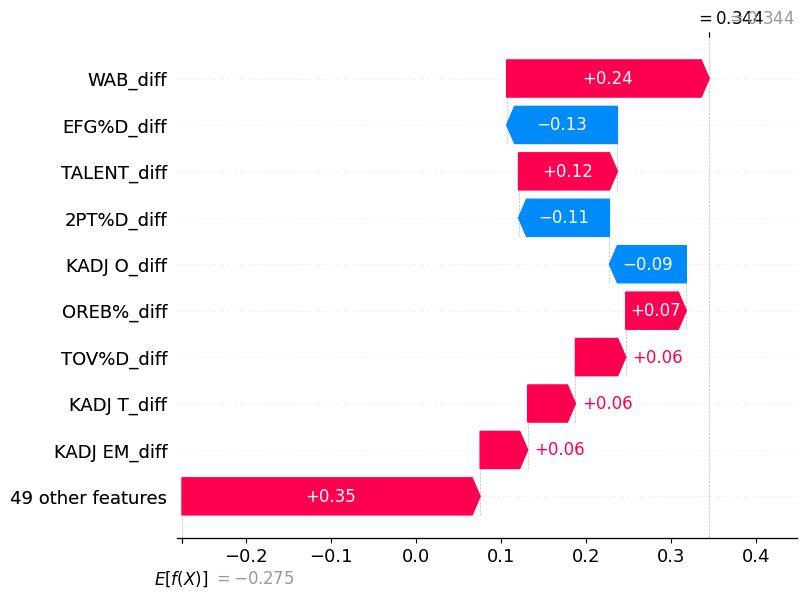

In [151]:
team1 = "BYU"
team2 = "VCU"

index = predictions_df[(predictions_df['TEAM_1'] == team1) & (predictions_df['TEAM_2'] == team2)].index[0]

shap.plots.waterfall(exp[index], max_display=10)

In [153]:
print("Feature values for the prediction:")
print(exp[0].data)

Feature values for the prediction:
None


In [123]:
print(explainer.expected_value)

-0.27518222
